In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from scipy import interpolate

In [2]:
def rfile(filename):
    x=[]
    y=[]
    z=[]
    with open(filename,"r") as inFile:
        for line in inFile:
            message = line.split(' ')
            x.append(float(message[0]))
            y.append(float(message[1]))
            z.append(float(message[2]))
        x = np.array(x)
        y = np.array(y)
        z = np.array(z)
    return x,y,z

In [3]:
def movingAverage(x):
    window=3
    narray = np.array(x)
    for i in range(1,narray.size-1):
        narray[i] = (x[i-1]+x[i+1]+x[i])/3
    return narray

In [4]:
def fangchai(x):
    x = movingAverage(x)
    length = len(x)
    fc = []
    fc.append(0.0)
    fc.append(0.0)
    for i in range(2,length-2):
        narray = np.array(x[i-2:i+3])
        fc.append(np.std(narray))
    fc.append(0.0)
    fc.append(0.0)
    fc = np.array(fc)
    return fc

In [5]:
def jiequ(fc_x):
    flag_x = (fc_x>0.3)
    count_t = 0
    count_f = 0
    start = []
    end = []
    for i in range(0,flag_x.size):
        if flag_x[i] == True:
            count_t = count_t+1
            if count_t >= 6:
                count_f=0
                if count_t==6:
                    start.append(i-5)
        if flag_x[i] == False:
            count_f=count_f+1
            if count_f >= 6:
                count_t=0
                if count_f==6:
                    end.append(i-5)
    start.append(flag_x.size-1)
    for i in range(0,len(end)):
        flag_x[end[i]:start[i]]=False
        if i != len(end)-1:
            flag_x[start[i]:end[i+1]]=True
    return flag_x

In [6]:
def slinear(number):
    x=np.linspace(1,number.size,number.size)
    y=number
    xnew=np.linspace(1,number.size,300)
    f=interpolate.interp1d(x,y,kind="slinear")
    ynew=f(xnew)
    return ynew

In [7]:
def readfile(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for file in dirs:
        x,y,z=rfile(join(path+file))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(x[flag_x])
        sy.append(y[flag_y])
        sz.append(z[flag_z])
    return sx,sy,sz

In [8]:
def readfilet(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    a=np.random.choice(1199, 5, replace=False)
    for i in a:
        x,y,z=rfile(join(path+dirs[i]))
        print(dirs[i])
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(x[flag_x])
        sy.append(y[flag_y])
        sz.append(z[flag_z])
    return sx,sy,sz,a

In [9]:
def readfiletest(filename,test2):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for i in test2:
        x,y,z=rfile(join(path+dirs[i]))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(x[flag_x])
        sy.append(y[flag_y])
        sz.append(z[flag_z])
    return sx,sy,sz

In [10]:
def lcs (test,train):
    test_len=len(test)
    train_len=len(train)
    same_jz=np.zeros((test_len+1,train_len+1))
    for i in range(1,test_len+1):
        for j in range(1,train_len+1):
            if test[i-1]>=train[j-1]-0.3 and test[i-1]<=train[j-1]+0.3:
                same_jz[i][j]=1+same_jz[i-1][j-1]
            else:
                same_jz[i][j]=max(same_jz[i-1][j],same_jz[i][j-1])
    return float(float(same_jz[test_len][train_len]*2)/float(test_len+train_len))*100

In [11]:
def test_lcs(test,train):
    t_lcs=[]
    for i in range(0,len(train)):
        l=lcs(test,train[i])
        t_lcs.append(l)
    t_lcs=np.array(t_lcs)
    return t_lcs

In [12]:
def avg_lcs(x,y,z):
    train_lcs=[]
    for i in range(0,len(x)-1):
        for j in range(i+1,len(x)):
            lx=lcs(x[i],x[j])
            ly=lcs(y[i],y[j])
            lz=lcs(z[i],z[j])
            train_lcs.append(lx+ly+lz)
    train_lcs=np.array(train_lcs)
    return train_lcs

In [13]:
sx,sy,sz,a=readfilet('./t/')

h123.txt
711.txt
767.txt
366.txt
389.txt


In [14]:
test1=np.arange(0,1200,1)

In [15]:
test2=np.setdiff1d(test1,a)

In [16]:
np.random.shuffle(test2)

In [17]:
train_lcs=avg_lcs(sx,sy,sz)

In [18]:
train_lcs.shape

(10,)

In [19]:
mean_lcs=np.mean(train_lcs)

In [20]:
std_lcs=np.std(train_lcs)

In [21]:
path='./test_123/'
dirs = os.listdir(path)
test_other=[]
test_hjl=[]
for files in dirs:
    test_x,test_y,test_z=readfile(join(path+files+'/'))
    if files=='hjl':
        continue
    else:
        for i in range(0,len(test_x)):
            test_other.append(np.mean(test_lcs(test_x[i],sx)+test_lcs(test_y[i],sy)+test_lcs(test_z[i],sz)))
test_other=np.array(test_other)

In [22]:
test_x,test_y,test_z=readfiletest('./t/',test2[0:800])
for i in range(0,len(test_x)):
            test_hjl.append(np.mean(test_lcs(test_x[i],sx)+test_lcs(test_y[i],sy)+test_lcs(test_z[i],sz)))
test_hjl=np.array(test_hjl)

In [31]:
far_lcs=[]
frr_lcs=[]
list=np.arange(1.6,2.2,0.1)
for i in list:
    count_tlcs=np.sum(test_other>(mean_lcs-i*std_lcs))
    far_lcs.append(count_tlcs/760)
    count_hflcs=800-np.sum(test_hjl>(mean_lcs-i*std_lcs))
    frr_lcs.append(count_hflcs/800)

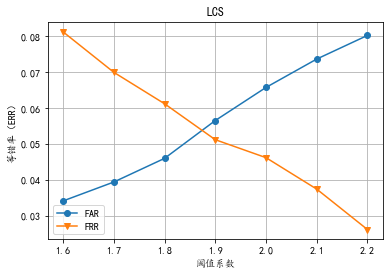

In [32]:
plt.rcParams['font.family']=['KaiTi']
plt.plot(list,far_lcs,marker='o',label='FAR')
plt.plot(list,frr_lcs,marker='v',label='FRR')
plt.title("LCS")
plt.xlabel("阈值系数")
plt.ylabel("等错率（ERR）")
# plt.xticks(list)
# plt.yticks(list)
plt.grid()
plt.legend()